# **Task 1: Regression Analysis**

# Import dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from warnings import filterwarnings
filterwarnings('ignore')

# Connect colab with drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Upload and read dataset using pandas

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Stock Prices Data Set.csv')
data.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


# Check for null values

In [ ]:
data.isnull().sum()

,0
symbol,0
date,0
open,11
high,8
low,8
close,0
volume,0


# Fill null values with previous values

In [ ]:
data.fillna(method='ffill', inplace=True)
data.isnull().sum()

,0
symbol,0
date,0
open,0
high,0
low,0
close,0
volume,0


# Check for duplicate values

In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
497467,False
497468,False
497469,False
497470,False


# Convert symbol column (string) to numeric using LabelEncoder

In [ ]:
le = LabelEncoder()
data['symbol'] = le.fit_transform(data['symbol'])
data.head()

,symbol,date,open,high,low,close,volume
0,1,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,3,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,2,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,4,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,5,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


# Change date format to ordinal

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data['date_ordinal'] = data['date'].apply(lambda date: date.toordinal())

# Separate dependent and independent data

In [ ]:
x = data.drop(['close', 'date'], axis=1)
y = data['close']

# Split data for training and testing

In [ ]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2, random_state=42)

# Train Linear regression model

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# Make predictions on test data

In [ ]:
y_pred = model.predict(x_test)

# Interpret the coefficients

In [ ]:
coefficients = model.coef_
intercept = model.intercept_
print("Intercept (beta_0):", intercept)
print("Coefficients (beta_1, beta_2, ...):", coefficients)

Intercept (beta_0): -7.876848062719802
Coefficients (beta_1, beta_2, ...): [ 1.54696967e-05 -5.65671642e-01  8.00165972e-01  7.65712429e-01
  1.54969371e-10  1.06778344e-05]


# Evaluate the model using MSE and R2

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

Mean Squared Error: 1.056577860795211
R-squared:  0.9998972106631924


# **Task 2: Time series analysis**

# Plot Close price

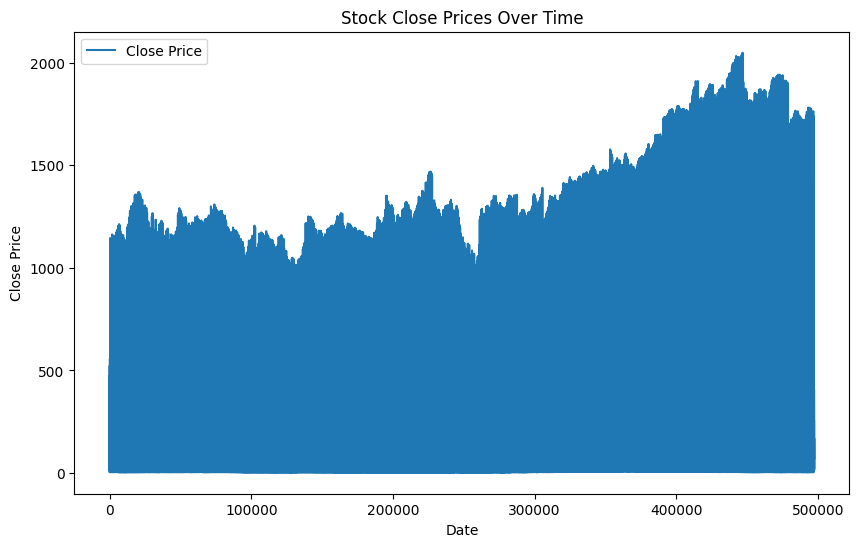

In [ ]:
# Plotting the close price over time
plt.figure(figsize=(10, 6))
plt.plot(data['close'], label="Close Price")
plt.title("Stock Close Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# Decompose series

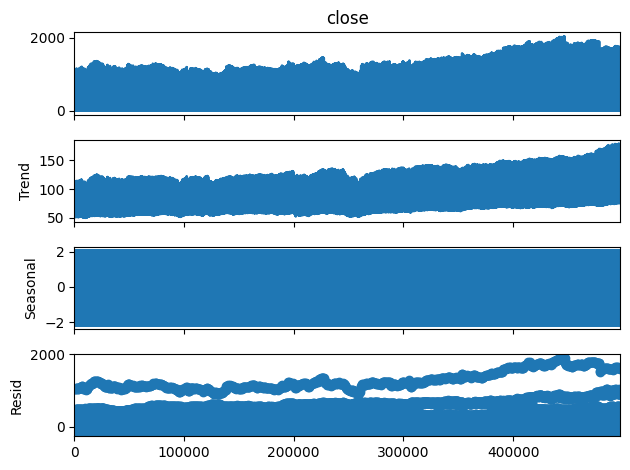

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the 'close' price
decomposition = seasonal_decompose(data['close'], model='additive', period=30)  # Adjust period as needed
decomposition.plot()
plt.show()

# Moving Average smoothing

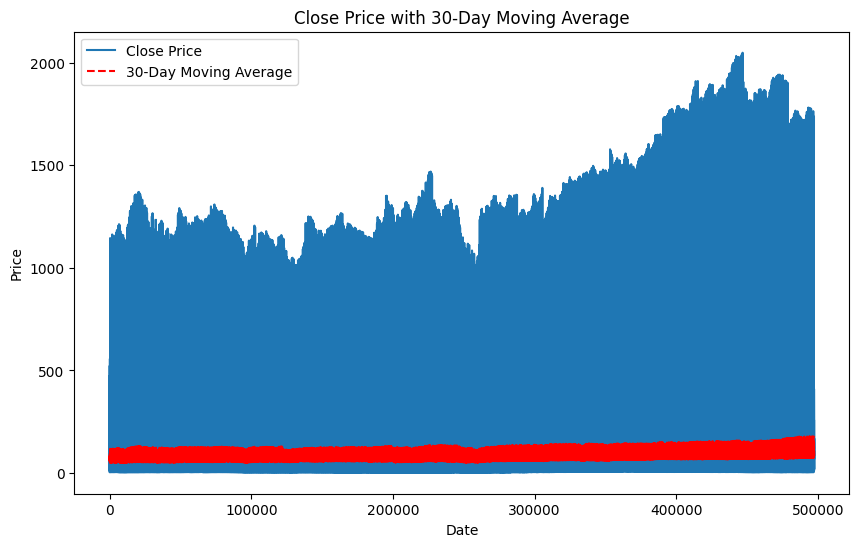

In [ ]:
# Calculate 30-day moving average for smoothing
data['moving_avg'] = data['close'].rolling(window=30).mean()

# Plotting original data and moving average
plt.figure(figsize=(10, 6))
plt.plot(data['close'], label="Close Price")
plt.plot(data['moving_avg'], label="30-Day Moving Average", color='red', linestyle='--')
plt.title("Close Price with 30-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

# **Task 3: Clustering analysis (k-means)**

# Standardize the data

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Select only numeric features for scaling
numeric_features = data.select_dtypes(include=['number']).columns
numeric_data = data[numeric_features]

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
numeric_data = imputer.fit_transform(numeric_data) # Impute missing values

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply k-means clustering

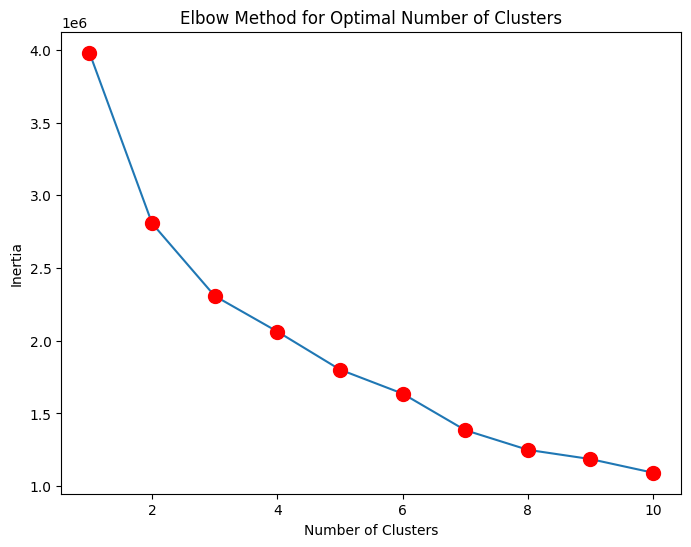

In [ ]:
# Calculate inertia for different numbers of clusters
inertia = []
for k in range(1, 11):  # Test for 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', markerfacecolor='red', markeredgecolor='red', markersize=10)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Assuming optimal clusters is 3 (for example, based on the elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original data
data['Cluster'] = clusters

# 2D scatter plot

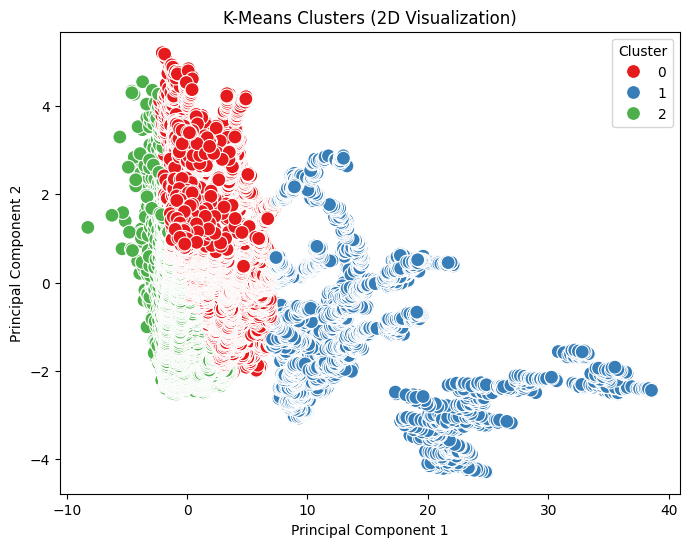

In [ ]:
import seaborn as sns

# If you have more than 2 features, reduce dimensionality to 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data['Cluster'], palette='Set1', s=100)
plt.title('K-Means Clusters (2D Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()